In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")

In [206]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [208]:
df['Date']=pd.to_datetime(df['Date'])

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [210]:
#get the month using data

df['month']=df['Date'].dt.month_name()

In [211]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [212]:
#Provide the trend chart for the number of complaints daily

df['Date'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-10      7
2015-05-24      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Date, Length: 91, dtype: int64

In [213]:
#or

dates=df.groupby(by=['Date']).count()['Ticket #']

In [214]:
daily=pd.DataFrame(dates).reset_index()

In [215]:
daily.sort_values(by=['Ticket #'],ascending=False)

,Date,Ticket #
84,2015-06-24,218
83,2015-06-23,190
85,2015-06-25,98
86,2015-06-26,55
90,2015-06-30,53
...,...,...
46,2015-05-17,7
41,2015-05-12,7
4,2015-04-05,6
10,2015-04-11,5


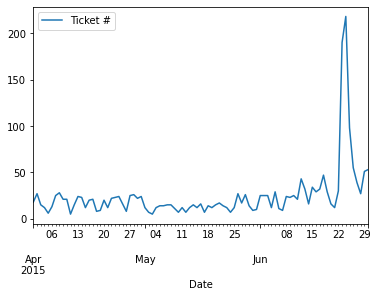

In [216]:
daily.plot(x='Date',y='Ticket #',kind='line')
plt.show()

In [217]:
#monthly complaint levels


mnth=df.groupby(by=['month']).count()['Ticket #']

In [218]:
mnth

month
April     545
June     1280
May       399
Name: Ticket #, dtype: int64

In [219]:
month_chart=pd.DataFrame(mnth).reset_index()

In [220]:
month_chart

,month,Ticket #
0,April,545
1,June,1280
2,May,399


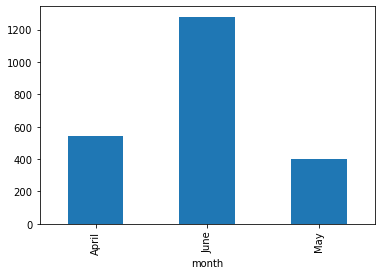

In [221]:
mnth.plot(x='month',y='Ticket #',kind='bar')
plt.show()

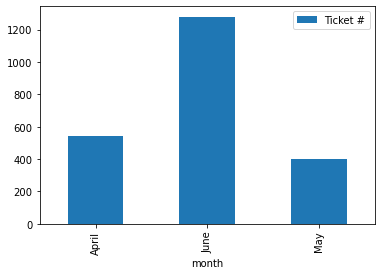

In [222]:
month_chart.plot(x='month',y='Ticket #',kind='bar')
plt.show()


In [223]:
df['Customer Complaint'].value_counts()

Comcast                                                                              83
Comcast Internet                                                                     18
Comcast Data Cap                                                                     17
comcast                                                                              13
Comcast Billing                                                                      11
                                                                                     ..
Comcast deceptive selling billing lack of service - SECOND And EXPANDED COMPLAINT     1
Home Security Forgery/Fraud                                                           1
Throttle internet                                                                     1
Pricing discrimination/ monopolistic behavior in an oligopolistic market              1
Comcast Outages                                                                       1
Name: Customer Complaint, Length

<AxesSubplot:>

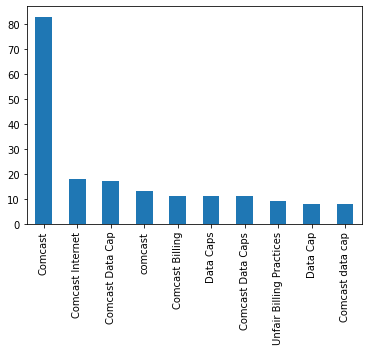

In [225]:
df['Customer Complaint'].value_counts()[:10].plot(kind='bar')

In [144]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


In [226]:
internet_issues1=df[df['Customer Complaint'].str.contains('network')].count()

In [146]:
internet_issues2=df[df['Customer Complaint'].str.contains('speed')].count()

In [147]:
internet_issues3=df[df['Customer Complaint'].str.contains('internet')].count()

In [148]:
billing_issues1=df[df['Customer Complaint'].str.contains('billing')].count()

In [149]:
billing_issues2=df[df['Customer Complaint'].str.contains('charges')].count()

In [150]:
service_issues1=df[df['Customer Complaint'].str.contains('service')].count()

In [151]:
service_issues2=df[df['Customer Complaint'].str.contains('customer')].count()

In [152]:
total_internet_issue=internet_issues1+internet_issues2+internet_issues3

In [153]:
total_billing_issue=billing_issues1+billing_issues2

In [154]:
total_service_issue=service_issues1+service_issues2

In [155]:
total_billing_issue

Ticket #                       169
Customer Complaint             169
Date                           169
Date_month_year                169
Time                           169
Received Via                   169
City                           169
State                          169
Zip code                       169
Status                         169
Filing on Behalf of Someone    169
month                          169
dtype: int64

In [156]:
total_internet_issue

Ticket #                       310
Customer Complaint             310
Date                           310
Date_month_year                310
Time                           310
Received Via                   310
City                           310
State                          310
Zip code                       310
Status                         310
Filing on Behalf of Someone    310
month                          310
dtype: int64

In [157]:
total_service_issue

Ticket #                       360
Customer Complaint             360
Date                           360
Date_month_year                360
Time                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
month                          360
dtype: int64

In [158]:
other_issue=2224-(total_billing_issue+total_internet_issue+total_service_issue)

In [159]:
df.shape

(2224, 12)

In [160]:
other_issue

Ticket #                       1385
Customer Complaint             1385
Date                           1385
Date_month_year                1385
Time                           1385
Received Via                   1385
City                           1385
State                          1385
Zip code                       1385
Status                         1385
Filing on Behalf of Someone    1385
month                          1385
dtype: int64

In [161]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open

In [162]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [227]:
df['newstatus']=[ 'Open'  if st=="Open" or st=="Pending"  else  'Closed'    for st in df['Status']]


In [164]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,newstatus
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed


In [165]:
#Which state has the maximum complaints

df.groupby(by='State').size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [166]:
#Provide state wise status of complaints in a stacked bar chart

In [167]:
state_complain=df.groupby(by=['State','newstatus']).size().unstack()

In [168]:
state_complain

newstatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


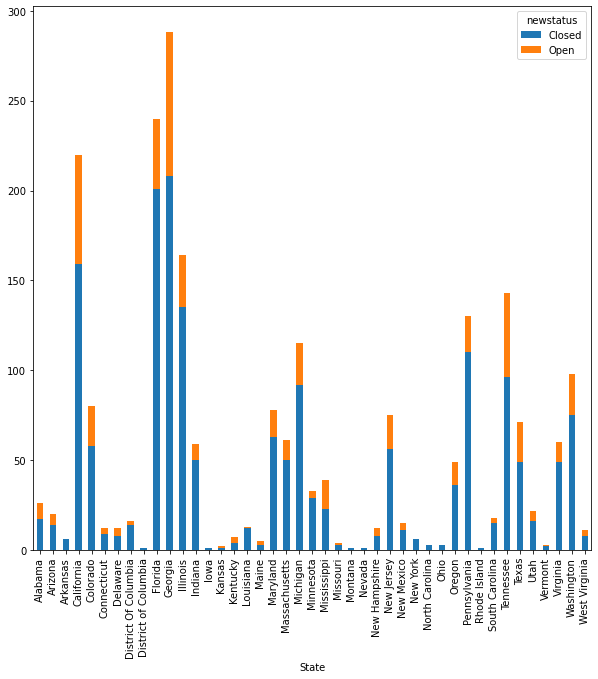

In [169]:

state_complain.plot.bar(figsize=(10,10),stacked=True)
plt.show()

In [170]:
#Which state has the highest percentage of unresolved complaints

In [171]:
df.newstatus.value_counts()

Closed    1707
Open       517
Name: newstatus, dtype: int64

In [172]:
unresolved_data=df.groupby(by=['State','newstatus']).size().unstack().fillna(0).sort_values(by='Open',ascending=False)

In [173]:
unresolved_data['unresolved_cmp_prect']=unresolved_data['Open']/unresolved_data['Open'].sum()*100

In [174]:
unresolved_data

newstatus,Closed,Open,unresolved_cmp_prect
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


<AxesSubplot:xlabel='State'>

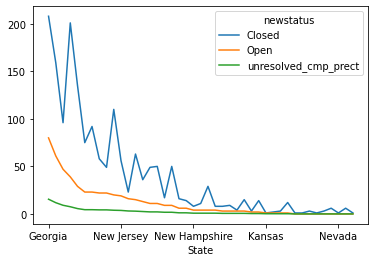

In [175]:
unresolved_data.plot()

In [176]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [177]:
resolved_data=df.groupby(by=['Received Via','newstatus']).size().unstack()

In [178]:
resolved_data['resolved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100

In [179]:
resolved_data['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

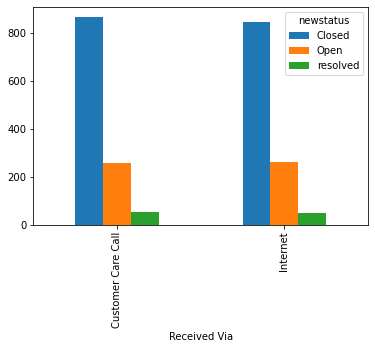

In [180]:
resolved_data.plot(kind='bar')